In [56]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes  import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,ConfusionMatrixDisplay
df=pd.read_csv("/content/fetal_health.csv")
df

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [58]:
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [59]:
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [60]:
df.tail()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
2121,140.0,0.000,0.000,0.007,0.0,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.0,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.0,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.0,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0
2125,142.0,0.002,0.002,0.008,0.0,0.0,0.0,74.0,0.4,36.0,...,117.0,159.0,2.0,1.0,145.0,143.0,145.0,1.0,0.0,1.0


In [61]:
df.isna().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [62]:
x=df.iloc[:,:-1].values
x

array([[1.20e+02, 0.00e+00, 0.00e+00, ..., 1.21e+02, 7.30e+01, 1.00e+00],
       [1.32e+02, 6.00e-03, 0.00e+00, ..., 1.40e+02, 1.20e+01, 0.00e+00],
       [1.33e+02, 3.00e-03, 0.00e+00, ..., 1.38e+02, 1.30e+01, 0.00e+00],
       ...,
       [1.40e+02, 1.00e-03, 0.00e+00, ..., 1.52e+02, 4.00e+00, 1.00e+00],
       [1.40e+02, 1.00e-03, 0.00e+00, ..., 1.51e+02, 4.00e+00, 1.00e+00],
       [1.42e+02, 2.00e-03, 2.00e-03, ..., 1.45e+02, 1.00e+00, 0.00e+00]])

In [63]:
y=df.iloc[:,-1].values
y

array([2., 1., 1., ..., 2., 2., 1.])

In [64]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=42)
xtrain

array([[1.43e+02, 0.00e+00, 0.00e+00, ..., 1.47e+02, 3.00e+00, 1.00e+00],
       [1.36e+02, 1.00e-02, 0.00e+00, ..., 1.44e+02, 1.90e+01, 1.00e+00],
       [1.15e+02, 9.00e-03, 5.50e-02, ..., 1.20e+02, 1.40e+01, 0.00e+00],
       ...,
       [1.22e+02, 5.00e-03, 0.00e+00, ..., 1.26e+02, 3.10e+01, 0.00e+00],
       [1.15e+02, 3.00e-03, 0.00e+00, ..., 1.29e+02, 4.50e+01, 0.00e+00],
       [1.42e+02, 1.00e-03, 0.00e+00, ..., 1.49e+02, 4.00e+00, 1.00e+00]])

In [65]:
scaler=StandardScaler()
scaler.fit(xtrain)
xtrain=scaler.transform(xtrain)
xtest=scaler.transform(xtest)
xtrain

array([[ 0.99746946, -0.82986059, -0.20477403, ...,  0.62198236,
        -0.54520305,  1.11410226],
       [ 0.29292023,  1.7351923 , -0.20477403, ...,  0.41688516,
         0.00214613,  1.11410226],
       [-1.82072748,  1.47868701,  0.90060981, ..., -1.22389247,
        -0.16890049, -0.52114544],
       ...,
       [-1.11617824,  0.45266586, -0.20477403, ..., -0.81369807,
         0.41265801, -0.52114544],
       [-1.82072748, -0.06034472, -0.20477403, ..., -0.60860086,
         0.89158855, -0.52114544],
       [ 0.89681957, -0.5733553 , -0.20477403, ...,  0.75871383,
        -0.51099372,  1.11410226]])

In [66]:
classifier1=KNeighborsClassifier(n_neighbors=5)
classifier1.fit(xtrain,ytrain)
ypred1=classifier1.predict(xtest)
ypred1

array([1., 1., 1., 1., 1., 3., 1., 3., 1., 2., 1., 3., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 3., 1., 1., 3., 3., 1., 1., 1., 1., 1., 1., 2.,
       1., 1., 1., 3., 2., 2., 1., 2., 1., 1., 1., 1., 1., 2., 1., 1., 1.,
       1., 1., 2., 2., 1., 1., 1., 2., 1., 2., 1., 2., 1., 1., 1., 2., 1.,
       1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 3., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 2., 3., 1., 1., 2., 2., 1., 2., 1.,
       1., 1., 1., 2., 1., 1., 3., 1., 2., 2., 1., 2., 1., 3., 1., 1., 2.,
       1., 1., 2., 1., 1., 1., 3., 3., 1., 1., 1., 3., 1., 1., 1., 1., 1.,
       1., 1., 1., 2., 2., 1., 1., 1., 3., 1., 1., 1., 1., 1., 1., 1., 2.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 2., 1., 1., 2., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 3., 2., 1., 1., 1., 3., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 3.,
       1., 1., 1., 1., 1.

In [67]:
score1=accuracy_score(ytest,ypred1)
score1*100

92.29323308270678

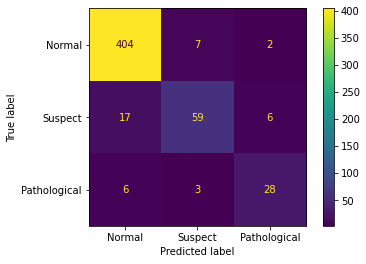

In [68]:
result1=confusion_matrix(ytest,ypred1)
label=['Normal','Suspect','Pathological']
cmd1=ConfusionMatrixDisplay(result1,display_labels=label)
cmd1.plot()

In [69]:
classifier2=GaussianNB()
classifier2.fit(xtrain,ytrain)
ypred2=classifier2.predict(xtest)
ypred2

array([2., 1., 1., 1., 3., 2., 1., 2., 2., 2., 1., 3., 1., 1., 2., 2., 3.,
       1., 2., 1., 2., 1., 2., 2., 2., 2., 3., 2., 1., 1., 3., 1., 1., 2.,
       1., 2., 1., 3., 2., 2., 1., 2., 1., 1., 1., 2., 1., 2., 1., 1., 2.,
       1., 2., 2., 2., 1., 2., 2., 2., 2., 2., 1., 2., 1., 2., 1., 2., 1.,
       1., 1., 1., 1., 1., 3., 1., 2., 1., 2., 1., 3., 2., 2., 1., 2., 2.,
       1., 1., 1., 2., 2., 2., 1., 1., 2., 2., 1., 2., 2., 2., 1., 2., 1.,
       1., 2., 1., 2., 2., 1., 2., 3., 2., 2., 1., 2., 2., 2., 1., 1., 2.,
       3., 2., 2., 1., 1., 3., 3., 3., 1., 2., 1., 3., 1., 1., 2., 2., 3.,
       2., 1., 2., 2., 2., 1., 3., 1., 3., 2., 1., 2., 1., 2., 2., 2., 2.,
       1., 1., 1., 2., 2., 1., 1., 1., 2., 1., 2., 1., 2., 2., 2., 2., 2.,
       2., 1., 1., 1., 1., 1., 1., 2., 1., 1., 2., 1., 2., 3., 2., 1., 1.,
       1., 3., 2., 2., 2., 3., 2., 1., 3., 1., 1., 1., 2., 2., 1., 1., 2.,
       2., 1., 3., 2., 1., 1., 2., 1., 1., 1., 1., 1., 1., 3., 1., 1., 1.,
       2., 1., 1., 2., 1.

In [70]:
score=accuracy_score(ytest,ypred2)
score*100


68.796992481203

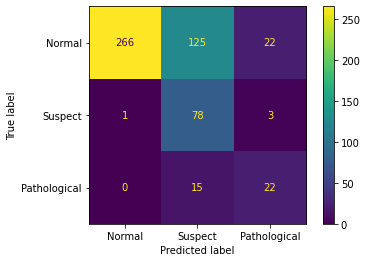

In [71]:
result2=confusion_matrix(ytest,ypred2)
cmd2=ConfusionMatrixDisplay(result2,display_labels=label)
cmd2.plot()

In [72]:
classifier3=SVC()
classifier3.fit(xtrain,ytrain)
ypred3=classifier3.predict(xtest)
ypred3

array([1., 1., 1., 1., 1., 3., 1., 3., 1., 2., 1., 3., 1., 1., 1., 2., 1.,
       1., 2., 1., 1., 1., 2., 1., 1., 3., 3., 2., 1., 1., 1., 1., 1., 2.,
       1., 1., 1., 3., 2., 2., 1., 2., 1., 1., 1., 2., 1., 2., 1., 1., 1.,
       1., 1., 2., 2., 1., 1., 1., 2., 1., 2., 1., 1., 1., 1., 1., 2., 1.,
       1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 2., 1., 1., 1., 2., 2., 1., 1., 2., 2., 1., 2., 1.,
       1., 1., 1., 2., 1., 1., 3., 1., 2., 2., 1., 2., 1., 3., 1., 1., 2.,
       1., 1., 2., 1., 1., 1., 3., 3., 1., 1., 1., 3., 1., 1., 1., 1., 1.,
       1., 1., 2., 2., 2., 1., 1., 1., 3., 1., 1., 1., 1., 1., 1., 1., 2.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 2., 1., 2., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1.,
       1., 3., 2., 1., 1., 1., 3., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 3.,
       1., 1., 1., 1., 1.

In [73]:
score=accuracy_score(ytest,ypred3)
score*100

91.72932330827066

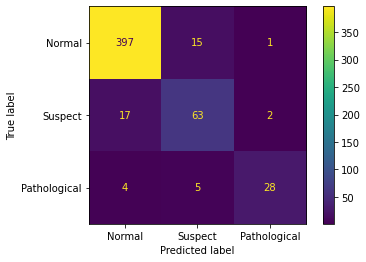

In [74]:
result3=confusion_matrix(ytest,ypred3)
cmd3=ConfusionMatrixDisplay(result3,display_labels=label)
cmd3.plot()